 # Introduction
Microbiomes form in every ecological niche where they work within to ensure health of that ecosystem. DNA sequencing has become more accessible, which has allowed researchers to move beyond small population hypothesis to diverse population modeling. Modeling a complex population provides an efficient way to leverage microbiome data. Mapping these interactions allows prediction of behavior and even engineering of microbiomes. The generalized Lokta-Volterra model is a common population dynamic modeling tool used for several ecosystems including microbial communities found in soil, lakes, and the human gut. The generalized Lotka-Volterra is wide ranged compared to the specific population predator-prey model and is based on a logistic growth model. Using this model does not account for random interactions and emerging structures but still provides a starting point that captures interactions within microbial communities. Microbe interactions depend on several factors including avaible resources, species diversity, and the inhabited environment. The parameters of this model allow an understanding of microbiomes over time and create a way to improve predicted outcomes to microbial populations. Modeling of microbial groups residing in an ecosystem gives an enhanced understanding of the dynamics of complex microbial communities. 

# Model Parameters

# Rates (microorganism/minute)

a11= -0.0005,
a13= -0.001,
a21= .00003,
a23=0,
a31= 0.0007,
a33= -0.11,
a41= 0.001,
a43=0,
a12= -0.001,	
a14= -0.001,
a22= -0.1,
a24=0,
a32=0,
a34=0,
a42=0,
a44= -0.115

r1=0.5,
r2=0.2,
r3=0.3,
r4=0.3

# Time Value (minutes)
Final time tf=50,
Initial time t0=0,
Duration n=50,
Time step dt=0.1,

# Initial Population (microorganisms)
Population 1 initial p1i=10,
Population 2 initial p2i=10,
Population 3 initial p3i=10,
Population 4 initial p4i=10


 # Model Development
The euler method of integration was used in combination with the Lokta Volterra model for population interactions to model the interaction between four microbial populations present in the gut microbiome. The rates of growth or decay are  portrayed as a subscript(to population x from population y). The rates describe the relationship between populations, which can show a decrease or increase in the population amount. Each population started with an amount of 10 organisms and the population was modeled at a time step of 0.1 for 50 minutes. The negative notation on the rates a show a loss of population from population x to population y. 


\begin{align}
\frac{dp1}{dt}=r1*p1(1+p1a11+p2a12+p3a13+p4a14)+p1 \,\,\,(eq. 1)
\end{align}

\begin{align}
\frac{dp2}{dt}=r2*p2(1+p2a22+p1a21+p3a23+p4a24)+p2 \,\,\,(eq. 2)
\end{align}

\begin{align}
\frac{dp3}{dt}=r3*p3(1+p3a33+p2a32+p1a31+p4a34)+p3 \,\,\,(eq. 3)
\end{align}

\begin{align}
\frac{dp4}{dt}=r4*p4(1+p1a41+p2a42+p3a43+p4a44)+p4 \,\,\,(eq. 4)
\end{align}


The for loop shown below described the Euler method of integration which analyzes the population at each time step and adds the new amount to the previous time step to show the actual population amount. Equations 1 through 4 are shown above and are used in the for loop to loop through time steps. This method of integration is helpful in mapping population growth or decay for a model that has an irregular growth or decay rate. 

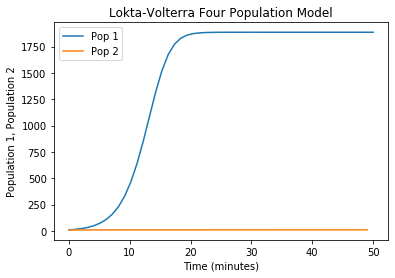

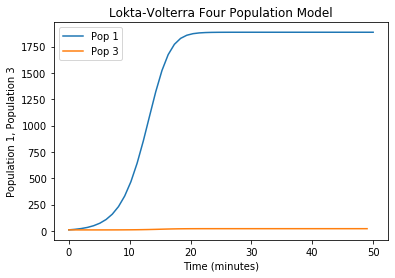

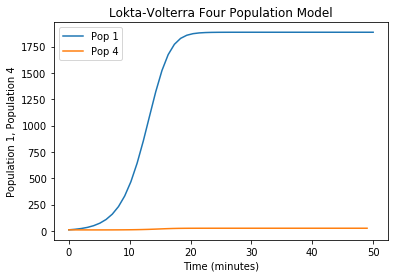

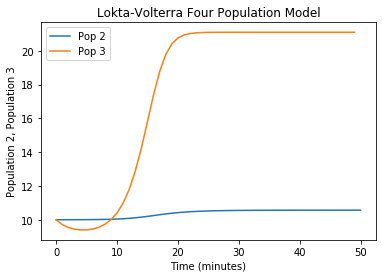

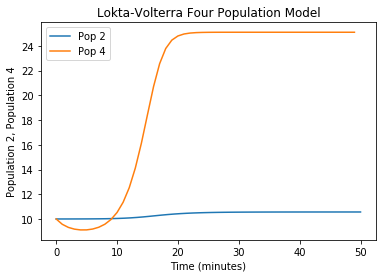

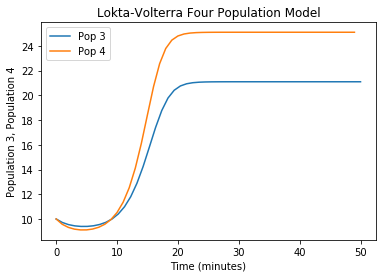

Text(0.5, 15.000000000000028, 'Time')

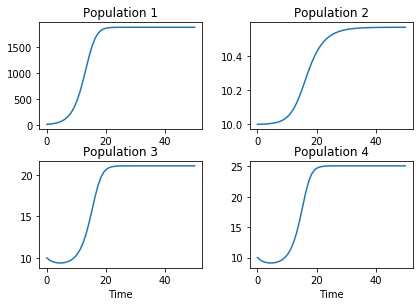

In [2]:
import numpy as np
import math as math
import matplotlib.pyplot as plt
from scipy.integrate import odeint


#rates
a11=-.0005
a13=-.001
a21=.00003
a23=0
a31=.0007
a33=-.11
a41=.001
a43=0
a12=-.001
a14=-.001
a22=-0.1
a24=0
a32=0
a34=0
a42=0
a44=-.115


r1=0.5
r2=0.2
r3=0.3
r4=0.3

#time restraints
tf = 50
t0=0
n=50
dt=0.1

#initial population amount
p1i=10
p2i=10
p3i=10
p4i=10



#initialize vectors for p1,p2,p3 and p4
p1 = np.zeros([n])  # Prepopulates a vector with zeros so speeds up processing time
p2 = np.zeros([n])
p3 = np.zeros([n])
p4 = np.zeros([n])


dt=(tf-t0)/(n-1)
t=np.linspace(t0,tf,n)

#For Loop for Eulers Method define initial values (in matlab s[1])
p1[0]=p1i
p2[0]=p2i
p3[0]=p3i
p4[0]=p4i


#four species equation    
    
for i in range (1,n):
    p1[i]=(dt*r1*p1[i-1])*(1+a11*p1[i-1]+a12*p2[i-1]+a13*p3[i-1]+a14*p4[i-1])+p1[i-1]
    p2[i]=(dt*r2*p2[i-1])*(1+a22*p2[i-1]+a21*p1[i-1]+a23*p3[i-1]+a24*p4[i-1])+p2[i-1]
    p3[i]=(dt*r3*p3[i-1])*(1+a33*p3[i-1]+a31*p1[i-1]+a32*p2[i-1]+a34*p4[i-1])+p3[i-1]
    p4[i]=(dt*r4*p4[i-1])*(1+a44*p4[i-1]+a41*p1[i-1]+a42*p2[i-1]+a43*p3[i-1])+p4[i-1]
    
#Comparison of 2 populations
plt.plot(t,p1,p2)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 1, Population 2")
plt.legend(['Pop 1',
            'Pop 2',
            'Pop 3',
            'Pop 4'])
plt.show()  

plt.plot(t,p1,p3)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 1, Population 3")
plt.legend(['Pop 1',
            'Pop 3',
            'Pop 3',
            'Pop 4'])
plt.show()  

plt.plot(t,p1,p4)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 1, Population 4")
plt.legend(['Pop 1',
            'Pop 4',
            'Pop 3',
            'Pop 4'])
plt.show()  

plt.plot(t,p2,p3)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 2, Population 3")
plt.legend(['Pop 2',
            'Pop 3',
            'Pop 3',
            'Pop 4'])
plt.show() 

plt.plot(t,p2,p4)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 2, Population 4")
plt.legend(['Pop 2',
            'Pop 4',
            'Pop 3',
            'Pop 4'])
plt.show() 

plt.plot(t,p3,p4)
plt.title("Lokta-Volterra Four Population Model")
plt.xlabel("Time (minutes)")
plt.ylabel("Population 3, Population 4")
plt.legend(['Pop 3',
            'Pop 4',
            'Pop 3',
            'Pop 4'])
plt.show()



#subplots
f, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2,2)
plt.tight_layout()
ax1.plot(t,p1)
ax1.set_title("Population 1")
ax2.plot(t,p2)
ax2.set_title("Population 2")
ax3.plot(t,p3)
ax3.set_title("Population 3")
ax3.set_xlabel("Time")
ax4.plot(t,p4)
ax4.set_title("Population 4")
ax4.set_xlabel("Time")


# Population 1,2,3 and 4 

# Simulation Results
Each population is graphed against time to show the growth trend over a time span of 50 minutes. Population 1 has a very large growth rate in comparison to the other 3 microbial populations, which makes it difficult to plot all four populations due to such a large difference in scale. Each population was plotted in combination with a different population to compare the growth trends more directly. Population 1 seems to have an exponentially larger growth rate, regardless of how population 2,3 or 4 is growing. This shows that population 2,3 and 4 do not compete with population 1. Population 2 hasthe smallest rate of increase in population size compared to population 1,3 and 4. This could mean that population 2 is fighting for resources or is being preyed upon by the other populations. The rate of increase starts to slow around 20 minutes at a population of 20 organisms. Population 3 shows the second smallest rate of increase, most likely due to the same reasons as population 2. The rate of increase slows and levels out around 20 minutes at a population of 20 organisms.  Population 4 has the second largest increase in population and levels out around 20 minutes at a population of 20 organisms. Population 4 may be the second most competitive organism, but it doesn not compare to the growth rate of population 1. Populations 3 and 4 show a slight decrease in growth initially. 

# Disccusion with Relevant Literature
The understanding of natural microbial communities is continuously growing and developing models that are a guideline to ecosystem interactions. Development has led to the engineering of synthetic microbial communities where mathematical approaches govern the functions within that community. Synthetic Ecology of Microbes: Mathematical Models and Applications reviews the critical math behind functions, dynamics, and evolution of microbial ecosystems. This journal takes the properties that are in a natural microbial world and compares different mathematical methods to create a model of these properties so that ecosystem predictions can be made. The generalized Lokta-Volterra model is a population dynamic model that uses generalized theoretical ecology to model competitive and cooperative interactions. It considers other species and the impact of their presence/absence with an interaction coefficient. Common limitations of the Lokta-Volterra model include not accounting for emerging structures or indirect metabolic interactions but this can be addressed by including the explicit dynamics of exchanged metabolites where the waste of one species feeds another species. A significant improvement described in the journal is to use of the reaction diffusion equation’s extensions and simplifications in junction with the population based Lokta- Volterra model. Natural microbial communities vary not only with time but with space as well due to properties of microbes. The reaction diffusion equation uses partial deferential equation models to understand the dynamics of the system across different locations. In practice the model determines the density of the species considered at different times and locations in space due to the diffusion and population-based interactions. This improvement allows for the study of ecological factors involved with the spatial effects in a microbial community.

# References
-	Kuntal, B. K., Gadgil, C., & Mande, S. S. (2019). Web-gLV: A Web Based Platform for Lotka-Volterra Based Modeling and Simulation of Microbial Populations. Frontiers in Microbiology, 10. doi: 10.3389/fmicb.2019.00288
-	POMD Technologies. (2009). Introduction to Compartment Models. Retrieved from http://www.pmod.com/files/download/v31/doc/pkin/4614.htm
-	Shiflet, A. B., & Shiflet, G. W. (2014). Introduction to computational science: modeling and simulation for the sciences. Princeton, N.J.: Princeton University Press.
-	Xiao, Y., Angulo, M. T., Friedman, J., Waldor, M. K., Weiss, S. T., & Liu, Y.-Y. (2017). Mapping the ecological networks of microbial communities. Nature Communications, 8(1). doi: 10.1038/s41467-017-02090-2
-	Zomorrodi, A. R., & Segrè, D. (2016). Synthetic Ecology of Microbes: Mathematical Models and Applications. Journal of Molecular Biology, 428(5), 837–861. doi: 10.1016/j.jmb.2015.10.019